In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Space_X.csv')
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,181,2022-08-28,Falcon 9,13260.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058
168,182,2022-08-31,Falcon 9,13260.0,VLEO,VAFB SLC 4E,True ASDS,7,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093
169,185,2022-09-17,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857
170,186,2022-09-24,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857


In [3]:
# Filter data for Falcon 9, delete all the rows with 'Falcon 1'
df = df[~(df['BoosterVersion'].isin(['Falcon 1']))]
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
9,13,2014-01-06,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
10,14,2014-04-18,Falcon 9,2296.0,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
11,15,2014-07-14,Falcon 9,1316.0,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
12,16,2014-08-05,Falcon 9,4535.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
13,17,2014-09-07,Falcon 9,4428.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [4]:
# Determine which columns are numeric or categorical
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [5]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,181,2022-08-28,Falcon 9,13260.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058
168,182,2022-08-31,Falcon 9,13260.0,VLEO,VAFB SLC 4E,True ASDS,7,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093
169,185,2022-09-17,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857
170,186,2022-09-24,Falcon 9,13260.0,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857


In [6]:
# Calculate the percentage of NA value for each column.
df.isnull().sum()/df.count()

FlightNumber      0.000000
Date              0.000000
BoosterVersion    0.000000
PayloadMass       0.150685
Orbit             0.005988
LaunchSite        0.000000
Outcome           0.000000
Flights           0.000000
GridFins          0.000000
Reused            0.000000
Legs              0.000000
LandingPad        0.183099
Block             0.000000
ReusedCount       0.000000
Serial            0.000000
Longitude         0.000000
Latitude          0.000000
dtype: float64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
ip_mean = SimpleImputer(strategy='mean')
df['PayloadMass'] = ip_mean.fit_transform((df['PayloadMass']).values.reshape(-1,1))
df.head()

/tmp/ipykernel_621846/604489665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PayloadMass'] = ip_mean.fit_transform((df['PayloadMass']).values.reshape(-1,1))


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [9]:
# LandingPad with NA value means it did not land successful, so replace NA value to 0.
df['LandingPad'] = df['LandingPad'].fillna('None')

/tmp/ipykernel_621846/2749503737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandingPad'] = df['LandingPad'].fillna('None')


In [12]:
df = df[df['Orbit'].notnull()]
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,181,2022-08-28,Falcon 9,13260.00000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058
168,182,2022-08-31,Falcon 9,13260.00000,VLEO,VAFB SLC 4E,True ASDS,7,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093
169,185,2022-09-17,Falcon 9,13260.00000,VLEO,CCSFS SLC 40,True ASDS,6,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857
170,186,2022-09-24,Falcon 9,13260.00000,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857


In [13]:
df.isnull().sum()/df.count()

FlightNumber      0.0
Date              0.0
BoosterVersion    0.0
PayloadMass       0.0
Orbit             0.0
LaunchSite        0.0
Outcome           0.0
Flights           0.0
GridFins          0.0
Reused            0.0
Legs              0.0
LandingPad        0.0
Block             0.0
ReusedCount       0.0
Serial            0.0
Longitude         0.0
Latitude          0.0
dtype: float64

In [14]:
# Calculate the number of launches on each site
launch_site = df['LaunchSite'].value_counts()
launch_site

CCSFS SLC 40    93
KSC LC 39A      48
VAFB SLC 4E     26
Name: LaunchSite, dtype: int64

In [15]:
# Count the type of orbits and the occurrences of orbits.
oribits = df['Orbit'].value_counts()
oribits

VLEO     54
ISS      32
GTO      31
LEO      14
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: Orbit, dtype: int64

In [24]:
serial = df['Serial'].value_counts()
serial

B1060    13
B1058    12
B1051    12
B1049    10
B1061    10
         ..
B1026     1
B1028     1
B1030     1
B1034     1
B1077     1
Name: Serial, Length: 62, dtype: int64

In [16]:
df['Orbit'].count()

167

In [17]:
# Count the outcomes.
outcomes = df['Outcome'].value_counts()
outcomes

True ASDS      109
True RTLS       22
None None       19
False ASDS       7
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: Outcome, dtype: int64

In [18]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    57
5e9e3033383ecbb9e534e7cc    39
None                        26
5e9e3033383ecb075134e7cd    20
5e9e3032383ecb267a34e7c7    17
5e9e3032383ecb554034e7c9     6
5e9e3032383ecb761634e7cb     2
Name: LandingPad, dtype: int64

In [19]:
# Classify landing results as successful or unsuccessful by creating a landing result label from the results column
successful_landings=['True Ocean', 'True RTLS', 'True ASDS']

# "1" for a successful landing and "0" for an unsuccessful landing.
landing_label = []
for outcome in df['Outcome']:
    if outcome in successful_landings:
        landing_label.append(1)
    else:
        landing_label.append(0)
# Create a new column that stands for the success of landing.
df['Landing']=landing_label
df.head(10)

/tmp/ipykernel_621846/2554939257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landing']=landing_label


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing
4,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0
9,13,2014-01-06,Falcon 9,3325.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1005,-80.577366,28.561857,0
10,14,2014-04-18,Falcon 9,2296.00000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,None,1.0,0,B1006,-80.577366,28.561857,1
11,15,2014-07-14,Falcon 9,1316.00000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,None,1.0,0,B1007,-80.577366,28.561857,1
12,16,2014-08-05,Falcon 9,4535.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1008,-80.577366,28.561857,0
13,17,2014-09-07,Falcon 9,4428.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1011,-80.577366,28.561857,0


In [27]:
df['Landing'].value_counts()

1    136
0     31
Name: Landing, dtype: int64

In [20]:
# Transfer boolean to '1' and '0'
df[['GridFins','Reused','Legs']] = df[['GridFins','Reused','Legs']].apply(LabelEncoder().fit_transform)
df.head(5)

/tmp/ipykernel_621846/524535920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GridFins','Reused','Legs']] = df[['GridFins','Reused','Legs']].apply(LabelEncoder().fit_transform)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing
4,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.561857,0
5,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.561857,0
6,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.561857,0
7,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
8,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.561857,0


<AxesSubplot: >

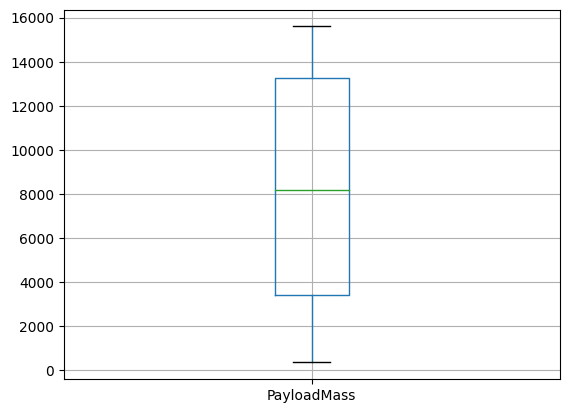

In [21]:
# Outliers detection
df.boxplot(['PayloadMass'])

In [22]:
df.to_csv("Falcon_9.csv", index=False)

In [23]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Landing
4,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.561857,0
5,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0005,-80.577366,28.561857,0
6,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0007,-80.577366,28.561857,0
7,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,0,0,0,None,1.0,0,B1003,-120.610829,34.632093,0
8,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,181,2022-08-28,Falcon 9,13260.00000,VLEO,KSC LC 39A,True ASDS,2,1,1,1,5e9e3033383ecb075134e7cd,5.0,1,B1069,-80.603956,28.608058,1
168,182,2022-08-31,Falcon 9,13260.00000,VLEO,VAFB SLC 4E,True ASDS,7,1,1,1,5e9e3032383ecb6bb234e7ca,5.0,6,B1063,-120.610829,34.632093,1
169,185,2022-09-17,Falcon 9,13260.00000,VLEO,CCSFS SLC 40,True ASDS,6,1,1,1,5e9e3033383ecbb9e534e7cc,5.0,5,B1067,-80.577366,28.561857,1
170,186,2022-09-24,Falcon 9,13260.00000,VLEO,CCSFS SLC 40,True ASDS,4,1,1,1,5e9e3033383ecbb9e534e7cc,5.0,0,B1072,-80.577366,28.561857,1
